In [1]:
# import necessary packages here

%matplotlib inline
from sklearn.svm import SVC
from sklearn import datasets
from bonnerlib import dfContour, df3D
import matplotlib.pyplot as plt
import numpy as np
import random


First, we'll generate a few sample datasets to get an idea of what the data looks like with different amounts of noise.

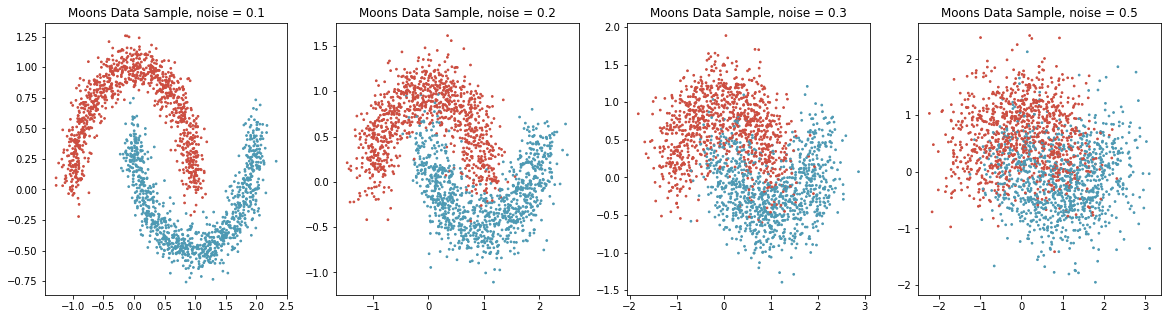

In [2]:
fig, axarr = plt.subplots(1, 4,  figsize = (20,5))
noises = [0.1,0.2,0.3,0.5]

# visualize some data
for i in range(0,4):
    data = datasets.make_moons(n_samples=2000, noise=noises[i])
    X,y = data
    axarr[i].set_title('Moons Data Sample, noise = {}'.format(noises[i]))
    colors = np.array([(0.8,0.3,0.25),(0.3,0.6,0.7)])
    axarr[i].scatter(X[:, 0], X[:, 1], color=colors[y],s=3)

We'll also try out the two plotting functions to see what each looks like.

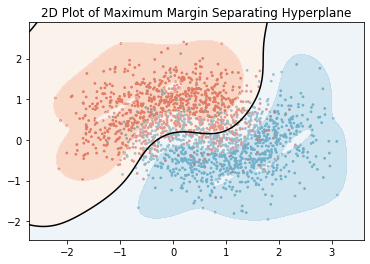

In [ ]:
# create default SVC with radial basis function kernel and plot decision boundary on data with noise = 05
clf = SVC(gamma = 1.0, C = 1.0)
clf.fit(X,y)

dfContour(clf,data,colors = colors,title = "2D Plot of Maximum Margin Separating Hyperplane")
df3D(clf,data,colors = colors,title = "3D Plot of Maximum Margin Separating Hyperplane")

# Part 1
*Generate two random samples of Moons data, a training set with 200 points and a test set with 2000 points. Both sets should have a noise level of 0.4 (so that the two moon classes overlap significantly). Use these two data sets throughout the rest of this question. In the questions below, you will be evaluating the training error and the test error of an SVM. The training error is the error on the training data, and the test error is the error on the test data.*

In [ ]:
# get 2200 random samples (from same distribution to make things a tiny bit easier)
random.seed = 0
X,y = datasets.make_moons(n_samples=2200, noise= 0.4)
X_train = X[0:200]
y_train = y[0:200]
X_test = X[200:]
y_test = y[200:]

# get a random item from X_test
idx = np.random.randint(0,2000)
print("Test item {}: X = {}, y = {}".format(idx,X[idx],y[idx]))

# Part 2
*A soft-margin SVM with an RBF kernel requires two hyper-parameters, C and γ. Write a Python program that carries out an exhaustive grid search for the best values of these parameters. (Do not use Scikit-learn’s build-in grid-search facility.) You should consider values of C and γ spread over several orders of magnitude. Choose them so that the values of log C are equally spaced, and likewise for log γ. You should use at least five values per order-of-magnitude (i.e., per factor-of-ten). (You may find the function numpy.linspace useful.) For each combination of values of C and γ, fit an SVM to the training data and evaluate its test error. Save the combination of C and γ that gives the lowest test error. Call these values C0 and γ0. Report these values as well as the test error. Generate and hand in a contour plot of the decision function with the decision boundary and margins highlighted.*

The hyperparameter C is a coefficient that weights the importance of maximizing the margin between examples of different classes in the overall optimization problem of fitting the support vector  machine. In effect, C can be used to tune the overfitting or underfitting of the model by balancing the tradoff between reducing the number of misclassifications with that of having a large margin of separation between classes.

The hyperparameter $\gamma$ controls The gamma parameter defines how far the influence of a single training example reaches. It A larger value results in a more complex model. 

Sources: 
- *https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html*
- *Cherkassky, Vladimir, and Yunqian Ma. "Practical selection of SVM parameters and noise estimation for SVM regression." Neural networks 17.1 (2004): 113-126.*

A variety of values were considered for C and $\gamma$. These values were spaced log-linearly. Taking the suggestion of scikit-learn's documentation, a range of 10<sup>-3</sup> to 10<sup>3</sup> was used for each.

In [ ]:
# define gammas
grid_size = 30
gammas = np.logspace(-3,5,grid_size)
Cs = np.logspace(-3,3,grid_size)
scores = np.zeros([grid_size,grid_size])

# loop through all combinations
for i in range(len(gammas)):
    for j in range(len(Cs)):
        gamma = gammas[i]
        C = Cs[j]
        
        # fit to training data
        clf = SVC(gamma=gamma,C=C)
        clf.fit(X_train,y_train)
        
        # score accuracy on test data
        scores[i,j] = clf.score(X_test,y_test)


In [ ]:
# get best parameters
best = np.argmax(scores)
best_gamma = gammas[int(best// grid_size)]
best_C = Cs[int(best%grid_size)]
best_score = scores.reshape(-1)[best]
print("Best gamma: {:.03f}, Best C:{:.03f}, Accuracy:{:.03f}".format(best_gamma,best_C,best_score))

In [ ]:
# plot accuracy as a grid heatmap

fig = plt.imshow(scores, cmap='viridis', interpolation='nearest')
plt.ylabel("gamma",fontsize = 16)
plt.xlabel("C",fontsize = 16)
plt.title("Hyperparameter grid search", fontsize = 16)
# define axis labels
n_labels = 11
step = int(grid_size / (n_labels - 1)) # step between consecutive labels
positions = np.arange(0,grid_size,step) # pixel count at label position
x_labels = Cs[::step] # labels you want to see
x_labels = ["{:.3f}".format(lab) for lab in x_labels]
plt.xticks(positions, x_labels,rotation = -70)
y_labels = gammas[::step] # labels you want to see
y_labels = ["{:.3f}".format(lab) for lab in y_labels]
plt.yticks(positions, y_labels)

# defien colorbar
cb = plt.colorbar()
cb.set_label('Accuracy',fontsize=16)

plt.show()

The optimal hyperparameters were found to be:  C<sub>0</sub> = 0.189 and $\gamma$<sub>0</sub> = 3.857. The test error for this case was 0.151 (accuracy = 0.849). The decision function is shown for the support vector machine trained with these hyperparameters.  In the 2d plot, the dark line indicates the decision boundary, and the dashed lines indicate the margins. Many of the points for each class fall inside these regions, indicating that many of the examples are classified with a large margin (roughly corresponding to a high confidence of prediction). 

In [ ]:
clf = SVC(gamma = best_gamma, C = best_C)
clf.fit(X_train,y_train)
data = (X_test,y_test)
dfContour(clf,data,colors = colors, margins = 1, title = "2D Plot of Maximum Margin Separating Hyperplane")

In the 3D plot, the decision boundary is the plane Z = 0. points between Z = -1 and Z = 1 fall within the margins of the support vector classifier, and these regions correspond to the lightest rings for each color (class) on the 2D projection of the 3D surface.

In [ ]:
df3D(clf,data,colors = colors,title = "3D Plot of Maximum Margin Separating Hyperplane")

# Part 3

*In this question you will fix the value of γ and vary the value of C. Generate two curves, one of test error vs log(C), and one of training error vs log(C). Use γ = γ0, and use 100 different values of log(C) equally spaced between log(C0) − 3 and log(C0) + 3. For each value of C you will have to retrain and retest the SVM. Plot both curves on one set of axes, using blue for the training error and green for the test error. You should find that the training error tends to decrease as C increases, and that the test error first tends to decrease and then increase, with its minimum very near C0. Provide an intuitive explanation of this behavior.*

In [ ]:
grid_size = 100
gamma = best_gamma
Cs = np.logspace(-3,3,grid_size)

train_scores = np.zeros(100)
test_scores = np.zeros(100)

for i in range(grid_size):
    C = Cs[i]
        
    # fit to training data
    clf = SVC(gamma=gamma,C=C)
    clf.fit(X_train,y_train)

    # score accuracy on test data
    train_scores[i] = clf.score(X_train,y_train)
    test_scores[i] = clf.score(X_test,y_test)

In [ ]:
# plot training and testing accuracy versus C
plt.plot(train_scores, c ='b')
plt.plot(test_scores, c = 'g')


# correct x ticks
n_labels = 20
step = int(grid_size / (n_labels - 1)) # step between consecutive labels
positions = np.arange(0,grid_size,step) # pixel count at label position
x_labels = Cs[::step] # labels you want to see
x_labels = ["{:.3f}".format(lab) for lab in x_labels]
plt.xticks(positions, x_labels,rotation = -70)
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.legend(["Training","Testing"])
plt.title("Accuracy versus hyperparameter C")
plt.show()

As expected, the training accuracy continues to increase with C, and the testing accuracy increases with C until C is around C<sub>0</sub>, then decreases with increasing C. This decrease in testing accuracy with increasing C can be seen as overfitting. Increasing C past the optimal value is essentially giving too much importance to misclassified examples in the training dataset. A high value for C encourages a very small margin as long as this hyperplane separates the data more cleanly. A high value of C causes the classifier to fit the noisy outliers in the training dataset, and as a result, the classifier is less able to accurately classify the testing dataset in which the noise is from the same distribution but has different values.

# Part 4

*Generate 7 contour plots of the decision function for different values of C. The values of log(C) should be equally spaced between log(C0) − 3 and log(C0) + 3, inclusive. Use γ = γ0 for each value of C. Display the 7 contour plots in a single figure in a grid pattern. (You will have to use the Python function plt.subplot (https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html)) The plots should highlight the decision boundaries, but not the margins. Provide an intuitive explanation of the changes you see. (Feel free to include other figures to support your explanations.)*

In [ ]:
# generate subplots
fig, axarr = plt.subplots(1, 7,  figsize = (35,5))

Cs = np.logspace(-3,3,7)
for i in range(len(Cs)):
    
    clf = SVC(gamma=best_gamma,C=Cs[i])
    clf.fit(X_train,y_train)
    plt.axes(axarr[i])
    data = (X_train,y_train)
    dfContour(clf,data,colors = colors, title = "C = {:.03f}".format(Cs[i]))
    

Clearly, as overfittedness of the decision function increases along with C. Intuitively, it appears that a value of C in the range of 0.1 to 1.0 would best fit the data without overfitting, and this is confirmed by the optimal value of C<sub>0</sub> = 0.189. As the value of C increases, so does the weight the classifier gives to correctly classifying each example correctly. As a result, the margin between the separating hyperplane and the closest data points on either side decreases, and the size of the margins decrease as a result. The margins when C = 0.1 are much bigger than when, say, C = 100 (these margins are hard to see in this plot).

# Part 5
*In this question you will fix the value of C and vary the value of γ. Generate two curves, one of test error vs log(γ), and one of training error vs log(γ). Use C = C0, and use 100 different values of log(γ) equally spaced between log(γ0) – 3 and log(γ0)+3. For each value of γ you will have to retrain and retest the SVM. Plot both curves on one set of axes, using blue for the training error and green for the test error. You should find that the training error tends to decrease
4
as γ increases, and that the test error first tends to decrease and then increase, with its minimum very near γ0. Provide an intuitive explanation of this behavior.*

In [ ]:
grid_size = 100
C = best_C
gammas = np.logspace(-3,3,grid_size)

train_scores = np.zeros(100)
test_scores = np.zeros(100)

for i in range(grid_size):
    gamma = gammas[i]
        
    # fit to training data
    clf = SVC(gamma=gamma,C=C)
    clf.fit(X_train,y_train)

    # score accuracy on test data
    train_scores[i] = clf.score(X_train,y_train)
    test_scores[i] = clf.score(X_test,y_test)

In [ ]:
# plot training and testing accuracy versus gamma
plt.plot(train_scores, c ='b')
plt.plot(test_scores, c = 'g')


# correct x ticks
n_labels = 20
step = int(grid_size / (n_labels - 1)) # step between consecutive labels
positions = np.arange(0,grid_size,step) # pixel count at label position
x_labels = gammas[::step] # labels you want to see
x_labels = ["{:.3f}".format(lab) for lab in x_labels]
plt.xticks(positions, x_labels,rotation = -70)
plt.xlabel("Gamma")
plt.ylabel("Accuracy")
plt.legend(["Training","Testing"])
plt.title("Accuracy versus hyperparameter Gamma")
plt.show()

In both the training and the testing datasets, accuracy increases with gamma to a point, then decreases. This point is slightly higher for the training set than the testing set (since the model overfits with respect to the testing data at a lower value of gamma). This plot confirms that a value of $\gamma$<sub>0</sub> = 3.857 is optimal since the testing dataset accuracy curve reaches its maximum at around this point, and accuracy then begins to decrease with increasing gamma. Gamma in essence inversely parametrizes the area over which a support vector exerts influence in fitting the decision function. If the value of gamma is low, each support vector has a large radius of influence on the decision function. As a result, all support vectors exert nearly global influence over the decision function, so this function roughly becomes the maximum margin linear separator between the two classes' centroids.  Conversely, if gamma is very high, each support vector has a very small radius of influence on the decision function, and if gamma becomes high enough, the radius of each support vector includes only the support vectors themselves. In this case, the classifier is severely overfit and has learned to classify only the exact locations of the support vectors. The optimal value for gamma is one that allows support vectors to influence the decision function in areas of the featurespace near to them, but not globally.

source:
*https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html*

# Part 6
*Generate 7 contour plots of the decision function for different values of γ. The values of log(γ) should be equally spaced between log(γ0) − 3 and log(γ0) + 3, inclusive. Use C = C0 for each value of γ. Display the 7 contour plots in a single figure in a grid pattern, as in part (d). Provide an intuitive explanation of the changes you see. (Feel free to include other figures to butress your explanation.)*

In [ ]:
# generate subplots
fig, axarr = plt.subplots(1, 7,  figsize = (35,5))

gammas = np.logspace(-3,3,7)
for i in range(len(gammas)):
    
    clf = SVC(gamma = gammas[i],C= best_C)
    clf.fit(X_train,y_train)
    plt.axes(axarr[i])
    data = (X_train,y_train)
    dfContour(clf,data,colors = colors, title = "Gamma = {:.03f}".format(gammas[i]))
    

As discussed above, when gamma is too low, the decision function becomes a linear separator between classes (as can be seen in the case of $\gamma$ = 0.01) When gamma is even lower, each support vector exerts a completely global influence, and the classifier predicts the majority class in all cases (as seen in the case of $\gamma$ = 0.001). Conversely, when gamma is too high, each support vector influences areas only very close to them, and the classifier is severely overfit because it has learned only the precise locations of the support vectors (as seen in the cases $\gamma$ = 100 and 1000.) The optimal gamma is one that gives support vectors a local, rather than global influence. Intuitively from the above plots, this value is likely between $\gamma$ = 1.0 (slightly underfit) and $\gamma$ = 10.0 (moderately overfit). This confirms the optimal value for gamma $\gamma$<sub>0</sub> = 3.857 found earlier.